# DNA Sequence Classification with Machine Learning and Python

A genome is a complete collection of DNA (Deoxyribonucleic Acid) in an organism. All living species possess a genome, but they differ considerably in size. For instance, the human genome is arranged into 23 chromosomes, which is being organized into 23 volumes like an encyclopedia. A human genome has about 6 billion characters or letters of 'A' (Adenine), 'C' (Cytosine), 'G' (Guanine), and 'T' (Thymine). If you count all the characters (individual DNA “base pairs”), it is a huge compilation and there would be more than 6 billion in each human genome.

The aim of this work is to understand how to interpret a DNA structure and how machine learning algorithms can be used to build a prediction model on DNA sequence data. This work is based on the following reference: https://www.theaidream.com/post/demystify-dna-sequencing-with-machine-learning-and-python

## Install Biopython and Squiggle libraries

In [1]:
!pip install biopython

     |████████████████████████████████| 2.3 MB 4.3 MB/s 


In [2]:
!pip install squiggle

     |████████████████████████████████| 100 kB 2.1 MB/s 
     |████████████████████████████████| 2.9 MB 9.9 MB/s 
  Created wheel for pyfaidx: filename=pyfaidx-0.6.4-py3-none-any.whl size=26558 sha256=92cf4f5df6d078320d9863b8191ef6da38478d6107e715bd9a298ed7ba010dfa
  Stored in directory: /root/.cache/pip/wheels/b2/16/a9/432d2035e17e4291f49cc518298a44192e5d4f544474f19123
Successfully built pyfaidx


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd '/content/drive/My Drive/ML_DNA_Sequencing'

/content/drive/My Drive/ML_DNA_Sequencing


DNA sequence data usually are contained in a file format called “fasta” format. Fasta format is simply a single line prefixed by the greater than symbol that contains annotations and another line that contains the sequence:


“AAGGTGAGTGAAATCTCAACACGAGTATGGTTCTGAGAGTAGCTCTGTAACTCTGAGG”

The file can contain one or many DNA sequences. There are lots of other formats, but fasta is the most common.

We will use Bio.SeqIO from Biopython for parsing DNA sequence data(fasta).


In [5]:
from Bio import SeqIO
for sequence in SeqIO.parse('example_dna_data.fa', "fasta"):
  print(sequence.id)
  print(sequence.seq)
  print(len(sequence))
  print(' ')

ENST00000435737.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA
390
 
ENST00000419127.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACTGACTCCCTGACCATTTACGACTCCCTTTTGCCCATCCGGAGC

In [6]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline 

In [7]:
# Human DNA Data
human_dna = pd.read_table('human_dna_data.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [8]:
# Chimpanzee DNA Data
chimp_dna = pd.read_table('chimp_dna_data.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [9]:
# Dog DNA Data
dog_dna = pd.read_table('dog_dna_data.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


Since machine learning/deep learning models require the input to be feature matrices or numerical values. Since, DNA data in character or string format, So encode these characters into matrices.

There are 3 general approaches to encode sequence data:

- Ordinal encoding DNA Sequence

- One-hot encoding DNA Sequence

- DNA sequence as a “language”, known as k-mer counting

let's implement each of them and see which gives us the perfect input features.

## Ordinal encoding DNA sequence data

In this approach, we need to encode each nitrogen base as an ordinal value.
For example, “ATGC” becomes [0.25, 0.5, 0.75, 1.0]. Any other base such as “N” can be a 0.

So let us create functions such as creating a NumPy array object from a sequence string, and a label encoder with the DNA sequence alphabet “a”, “c”, “g” and “t”, but also a character for anything else, “n”.

In [10]:
import numpy as np
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'n', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

And here is a function to encode a DNA sequence string as an ordinal vector. It returns a NumPy array with A=0.25, C=0.50, G=0.75, T=1.00, n=0.00.

In [11]:
def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25    # A
    float_encoded[float_encoded == 1] = 0.50    # C
    float_encoded[float_encoded == 2] = 0.75    # G
    float_encoded[float_encoded == 3] = 1.00    # T
    float_encoded[float_encoded == 4] = 0.00    # anything else, lets say n
    return float_encoded

#Let’s try it out for a simple short sequence:
seq_test = 'TTCAGCCAGTG'
ordinal_encoder(string_to_array(seq_test))

array([1.  , 1.  , 0.5 , 0.25, 0.75, 0.5 , 0.5 , 0.25, 0.75, 1.  , 0.75])

## One-hot encoding DNA Sequence

This approach is widely used in deep learning methods and lends itself well to algorithms like convolutional neural networks. In this example, 'ATGC' would become [1,0,0,0], [0,0,0,1], [0,0,1,0], [0,1,0,0]. And these one-hot encoded vectors can either be concatenated or turned into 2-dimensional arrays.

In [12]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(seq_string):
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    return onehot_encoded


#Let’s try it out with a simple short sequence:
seq_test = 'GAATTCTCGAA'
one_hot_encoder(string_to_array(seq_test))

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [13]:
seq_test = 'GAATTCTCGAA'
print("seq_test DNA\n", list(seq_test))
print("encoded DNA \n", one_hot_encoder(string_to_array(seq_test)).T)

seq_test DNA
 ['G', 'A', 'A', 'T', 'T', 'C', 'T', 'C', 'G', 'A', 'A']
encoded DNA 
 [[0 1 1 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 1 0 0 0 0]]


## DNA sequence as a “language”, known as k-mer counting

In bioinformatics, k-mers are substrings of length *k* contained within a biological sequence. Primarily used within the context of computational genomics and sequence analysis, in which k-mers are composed of nucleotides (i.e. A, T, G, and C), k-mers are capitalized upon to assemble DNA sequences,improve heterologous gene expression, identify species in metagenomic samples, and create attenuated vaccines. Usually, the term k-mer refers to all of a sequence's subsequences of length *k*, such that the sequence AGAT would have four monomers (A, G, A, and T), three 2-mers (AG, GA, AT), two 3-mers (AGA and GAT) and one 4-mer (AGAT). More generally, a sequence of length *L* will have *(L-k+1)* k-mers and *n^k* total possible k-mers, where *n* is number of possible monomers (e.g. four in the case of DNA). https://en.wikipedia.org/wiki/K-mer

The method we use here is that first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if we use “words” of length 6 (hexamers or 6-mers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

In genomics, we refer to these types of manipulations as “k-mer counting”, or counting the occurrences of each possible k-mer sequence and Python natural language processing tools make it super easy.

In [14]:
def k_mers_funct(seq, size):
  return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]


#Let’s try it out with a simple sequence
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
k_mers_funct(mySeq, size=7)

['gtgccca',
 'tgcccag',
 'gcccagg',
 'cccaggt',
 'ccaggtt',
 'caggttc',
 'aggttca',
 'ggttcag',
 'gttcagt',
 'ttcagtg',
 'tcagtga',
 'cagtgag',
 'agtgagt',
 'gtgagtg',
 'tgagtga',
 'gagtgac',
 'agtgaca',
 'gtgacac',
 'tgacaca',
 'gacacag',
 'acacagg',
 'cacaggc',
 'acaggca',
 'caggcag']

It returns a list of k-mer “words.” You can then join the “words” into a “sentence”, then apply your favorite natural language processing methods on the “sentences” as you normally would.

In [15]:
words = k_mers_funct(mySeq, size=6)
joined_sentence = ' '.join(words)
joined_sentence

'gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag'

You can tune both the word length and the amount of overlap. This allows you to determine how the DNA sequence information and vocabulary size will be important in your application. For example, if you use words of length 6, and there are 4 letters, you have a vocabulary of size 4096 possible words. You can then go on and create a bag-of-words model like you would in NLP.

Let’s make a couple more “sentences” to make it more interesting.

In [16]:
#Let’s make a couple more “sentences” to make it more interesting
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(k_mers_funct(mySeq1, size=6))
sentence2 = ' '.join(k_mers_funct(mySeq2, size=6))

In [17]:
#Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()
X

array([[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1]])

For more information on 'CountVectorizer' refer to the follwing link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

## Machine learning Role

Now, we can build a classification model that is trained on the human DNA sequence and can predict a gene family based on the (DNA sequence of) the coding DNA sequence. To test the model, we will use the DNA sequence of humans, dogs, and chimpanzees and compare the accuracies.

Gene families are groups of related genes that share a common ancestor. Members of gene families may be paralogs or orthologs. Gene paralogs are genes with similar sequences from within the same species while gene orthologs are genes with similar sequences in different species.

In [18]:
# Load the human DNA sequence
human_dna = pd.read_table('human_dna_data.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [19]:
human_dna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [20]:
sorted(human_dna['class'].unique())

[0, 1, 2, 3, 4, 5, 6]

The following are the definitions for each of the 7 classes and the total of each class presented in the human_dna dataset:

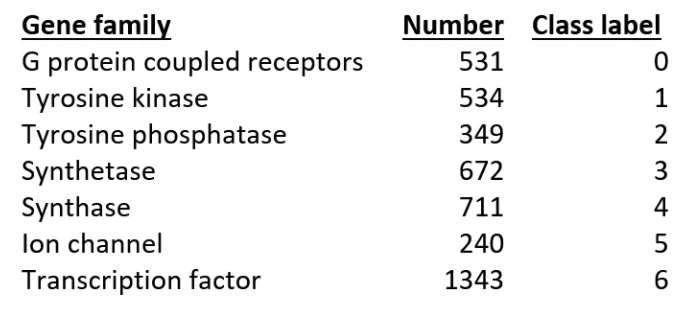

Text(0.5, 1.0, 'Class distribution of Human DNA')

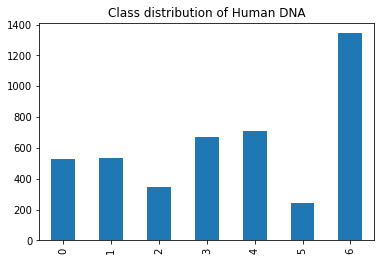

In [21]:
#Plot the class distribution of human DNA data
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title('Class distribution of Human DNA')

In [22]:
#Load the Chimpanzee DNA data
chimp_dna = pd.read_table('chimp_dna_data.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [23]:
chimp_dna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  1682 non-null   object
 1   class     1682 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


Text(0.5, 1.0, 'Class distribution of Chimpanzee DNA')

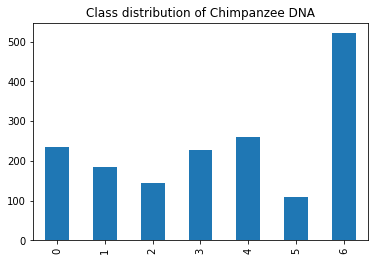

In [24]:
#Plot the class distribution of Chimpanzee DNA data
chimp_dna['class'].value_counts().sort_index().plot.bar()
plt.title('Class distribution of Chimpanzee DNA')

In [25]:
#Load the Dog DNA data
dog_dna = pd.read_table('dog_dna_data.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [26]:
dog_dna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  820 non-null    object
 1   class     820 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.9+ KB


Text(0.5, 1.0, 'Class distribution of Dog DNA')

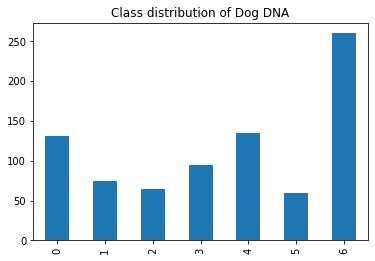

In [27]:
#Plot the class distribution of Dog DNA data
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title('Class distribution of Dog DNA')

### Now, convert a sequence of characters into k-mer words, default size = 6 (hexamers). The function k_mers_funct() will collect all possible overlapping k-mers of a specified length from any sequence string.

In [28]:
#Convert our training data sequences into short overlapping k-mers of length 6
def k_mers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]


#Let's do that for each species of data by using our k_mers_funct() function.
human_dna['words'] = human_dna.apply(lambda x: k_mers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimp_dna['words'] = chimp_dna.apply(lambda x: k_mers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: k_mers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

### Now, the DNA sequences are changed to lowercase, divided into all possible k-mer words of length 6, and ready to use for the next step.

In [29]:
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


### We now need to convert the lists of k-mers for each gene into string sentences of words that can be used to create the Bag of Words model. Also, we will make a target variable y to hold the class labels.

In [30]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values  #class labels for human_dna

In [31]:
y_human

array([4, 4, 3, ..., 6, 6, 6])

### Let's do the same for Chimpanzee and Dog DNA data.

In [32]:
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chimp = chimp_dna.iloc[:, 0].values  #class labels for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  #class labels for dog_dna

In [33]:
y_chimp

array([4, 4, 4, ..., 6, 3, 3])

In [34]:
y_dog

array([4, 4, 6, 6, 0, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 0, 3, 3, 6, 6, 6, 6, 4, 0, 0, 4, 2, 0, 0, 0, 0, 6, 0, 6, 0,
       0, 5, 5, 6, 4, 6, 0, 0, 3, 6, 3, 6, 6, 6, 6, 6, 4, 6, 4, 1, 4, 0,
       0, 0, 6, 4, 4, 6, 6, 6, 6, 6, 4, 6, 6, 3, 3, 3, 3, 0, 6, 3, 3, 6,
       4, 4, 5, 6, 6, 1, 5, 2, 2, 1, 4, 2, 6, 3, 3, 6, 6, 6, 3, 3, 6, 6,
       6, 3, 6, 6, 2, 0, 0, 6, 6, 3, 3, 3, 0, 0, 4, 6, 6, 5, 1, 1, 0, 0,
       0, 4, 0, 4, 0, 0, 3, 4, 6, 0, 6, 6, 3, 4, 0, 6, 6, 1, 2, 2, 2, 3,
       6, 2, 2, 2, 6, 0, 0, 6, 6, 0, 0, 1, 6, 5, 5, 6, 0, 6, 0, 0, 4, 0,
       0, 3, 4, 0, 0, 6, 6, 5, 5, 3, 4, 1, 0, 6, 5, 6, 6, 4, 4, 2, 2, 2,
       4, 6, 4, 4, 2, 1, 3, 6, 0, 6, 2, 3, 0, 0, 6, 0, 6, 4, 3, 1, 1, 4,
       6, 4, 4, 6, 3, 3, 2, 2, 1, 1, 3, 3, 4, 3, 0, 3, 5, 5, 5, 5, 5, 5,
       5, 2, 2, 4, 4, 6, 4, 4, 6, 6, 6, 0, 3, 3, 4, 3, 0, 0, 6, 0, 0, 6,
       6, 1, 5, 5, 0, 0, 6, 6, 1, 1, 1, 4, 2, 2, 3,

### Now, create the Bag of Words model using CountVectorizer(). This is equivalent to k-mer counting. The n-gram size of 4 is used to extract different word n-grams (i.e. 4-grams).
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

### Then convert our k-mer words into uniform length numerical vectors that represent counts for every k-mer in the vocabulary:

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4
X_human = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [36]:
#Print the shape of each vocabulary
print(X_human.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


### So, for humans we have 4380 genes converted into uniform length feature vectors of 4-gram k-mer (length 6) counts. For Chimpanzee and Dog, we have the same number of features with 1682 and 820 genes respectively.

### Now, we know how to transform our DNA sequences into uniform length numerical vectors in the form of k-mer counts and ngrams, we can now go ahead and build a classification model that can predict the DNA sequence function based only on the sequence itself.

### Here the human data is used to train the model, holding out 20% of the data to test the model. Then we can evaluate the model’s generalizability by trying to predict sequence function in other species (i.e. the Chimpanzee and the Dog).

### Next, split human dna dataset into train/test and build a simple multinomial naive Bayes classifier.

https://scikit-learn.org/stable/modules/naive_bayes.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

### You might want to do some parameter tuning and build a model with different n-gram sizes, here an n-gram size of 4 is used by setting the smoothing priors alpha as 0.1.

In [37]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_human_train, X_human_test, y_human_train, y_human_test = train_test_split(X_human, y_human, test_size = 0.2, random_state=42)

In [38]:
#Build a multinomial naive Bayes classifier with n-gram size of 4  and alpha value of 0.1
from sklearn.naive_bayes import MultinomialNB
clf_model = MultinomialNB(alpha=0.1)
clf_model.fit(X_human_train, y_human_train)

MultinomialNB(alpha=0.1)

### Now let's make predictions on the human dna hold out test data set and see how the model performes on unseen data.

In [39]:
y_human_pred = clf_model.predict(X_human_test)

### Now, let's evaluate the model performance by looking into classification metrics like the confusion matrix, accuracy, precision, recall and f1-score.

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human DNA test dataset\n")
print(pd.crosstab(pd.Series(y_human_test, name='Actual'), pd.Series(y_human_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_human_test, y_human_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human DNA test dataset

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


### The model is giving really good results on the unseen human dna test dataset, and so it looks like the model did not overfit to the training data. Since the present dataset is relatively small, in a real project scenario you would sample many more train/test splits to see for the better performance of the model.

### Now for the real test, let's see how the model perfoms on the DNA sequences from other species. First we'll try the Chimpanzee DNA sequence, which we would expect to be very similar to human. Then we will try with the Dog DNA sequence.

In [41]:
# Predictions on Chimpanzee DNA sequence
y_chimp_pred = clf_model.predict(X_chimp)

# Performance of the model on Chimpanzee genes
print("Confusion matrix for predictions on Chimpanzee DNA sequence data\n")
print(pd.crosstab(pd.Series(y_chimp, name='Actual'), pd.Series(y_chimp_pred, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chimp, y_chimp_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Chimpanzee DNA sequence data

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


In [42]:
# Predictions on Dog DNA sequence
y_dog_pred = clf_model.predict(X_dog)

# Performance of the model on Dog genes
print("Confusion matrix for predictions on Dog DNA sequence data\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_dog_pred, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_dog_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Dog DNA sequence data

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925


### The model seems to produce good results on human DNA data. It also does on Chimpanzee DNA data which is because the Chimpanzees and humans share the same genetic hierarchy. However, the performance on the Dog DNA data is not quite as good which is because the Dog is more diverging from humans than the chimpanzees.